In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import pytz
import uproot 
import numpy.ma as ma
import scipy.optimize as scipy
import math
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.path import Path
import pickle
import pickletools
import datetime
import pytz
from matplotlib.lines import Line2D
import csv

In [2]:
# load general data
unsalted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_unsalted.files.root')
salted = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_salted.files.root')
data = uproot.open('/global/homes/k/kwild/ALPACA/run/SR3RunsAnalysis/SR3-WSv8_LZAP-5.5.3_files.root')

# get keys
data.keys()

['SS;1']

In [3]:
# select the tree of interest from the file, in this case single scatter events, and get its keys

tree = data['SS;1']
tree.keys()

['runID',
 'eventID',
 'triggerTimeStamp_s',
 'triggerTimeStamp_ns',
 'daq_livetime',
 'trigger_livetime',
 'physics_livetime',
 'SS_raw_S1',
 'SS_raw_S2',
 'SS_raw_S2_top',
 'SS_raw_S2_bot',
 'SS_S1c',
 'SS_S2c',
 'SS_S2c_top',
 'SS_S2c_bot',
 'SS_driftTime_us',
 'SS_X_cm',
 'SS_Y_cm',
 'SS_R_cm',
 'SS_cX_cm',
 'SS_cY_cm',
 'SS_cR_cm',
 'SS_cZ_cm',
 'SS_s1TBA',
 'cxSR1_HSX',
 'cxSR1_SPEX',
 'cxSR1_S1rate',
 'cxSR1_muonV',
 'cxSR1_EA',
 'cxSR1_HSC',
 'cxSR1_stinger',
 'cxSR1_S1shape',
 'cxSR1_S1prom',
 'cxSR1_S1timing',
 'cxSR1_S1TBA',
 'cxSR1_S2TBA',
 'cxSR1_validXY',
 'cxSR1_S2width',
 'cxSR1_narrowS2',
 'cxSR1_S2earlypeak',
 'cxSR1_S2risetime',
 'cxSR1_FCRXY',
 'cxSR1_FV',
 'cxSR1_burst_noise',
 'cxSR1_buffer',
 'cxSR1_skinV',
 'cxSR1_skinVprompt',
 'cxSR1_skinVdel',
 'cxSR1_ODV',
 'cxSR1_ODVprompt',
 'cxSR1_ODVdel',
 'cxSR3_HSX',
 'cxSR3_SPEX',
 'cxSR3_S1rate',
 'cxSR3_muonV',
 'cxSR3_ETV',
 'cxSR3_HSC',
 'cxSR3_stinger',
 'cxSR3_S1TBA',
 'cxSR3_S2TBA',
 'cxSR3_S2XYquality',
 'cxSR

In [4]:
# declare variables
# get the data from the trees

# now including all available SR3 cuts as of 07Nov2023

# signal quality
dT_us = np.array(tree['SS_driftTime_us'])
S1_phd = np.array(tree['SS_raw_S1'])
S2_phd = np.array(tree['SS_raw_S2'])
S1c_phd = np.array(tree['SS_S1c'])
S2c_phd = np.array(tree['SS_S2c'])
x_cm = np.array(tree['SS_X_cm'])
y_cm = np.array(tree['SS_Y_cm'])
r2_cm2 = x_cm**2 + y_cm**2

# pulse info
eventID = np.array(tree['eventID'])
runID = np.array(tree['runID'])
trigTime_s_POSIX = np.array(tree['triggerTimeStamp_s'])
trigTime_ns_past_POSIX = np.array(tree['triggerTimeStamp_ns'])

In [5]:
# get pickled data 

# Open the pickle file in binary read mode and load the data

# Get the default protocol version used in the pickle file
protocol_version = pickle.DEFAULT_PROTOCOL
# Print the protocol version
print(f"Pickle Protocol Version: {protocol_version}")

# Function to load data from a pickle file and display it
def load_and_display_data(file_name):
    with open(file_name, 'rb') as file:
        loaded_data = pickle.load(file)
        print(f"Loaded Data from {file_name}:")
        print(loaded_data)
        print()
    return loaded_data

# File names of the pickle files
file_names = ['SR3v8_Xe131m_events_data-selection.pickle']

# Load data from each pickle file and store in a list
loaded_data_list = [load_and_display_data(file_name) for file_name in file_names]

Pickle Protocol Version: 4
Loaded Data from SR3v8_Xe131m_events_data-selection.pickle:
{'S1_phd_xe131m': array([898.46002197, 921.61120605, 994.76989746, ..., 861.02520752,
       830.31341553, 929.24182129]), 'S2_phd_xe131m': array([131146.203125 , 135563.765625 , 106800.0703125, ...,
       121654.171875 , 141751.21875  , 112764.796875 ]), 'S1c_phd_xe131m': array([ 997.23138428,  942.93835449, 1080.08898926, ...,  939.66723633,
        839.01220703, 1049.62133789]), 'S2c_phd_xe131m': array([130203.875    , 145059.890625 , 112257.9453125, ...,
       127147.046875 , 173537.890625 , 116677.78125  ]), 'x_cm_xe131m': array([  0.08344586, -23.88975525, -41.7986145 , ..., -38.69729614,
        -4.6638999 ,  12.27566051]), 'y_cm_xe131m': array([-37.10499573,  34.08329773, -18.85547447, ...,  18.41867256,
       -58.61328125, -43.40350342]), 'dT_us_xe131m': array([130.00100781, 498.01003125, 298.569     , ..., 261.10998438,
       606.44      ,  59.76300391]), 'r2_cm2_xe131m': array([1376.78

In [6]:
# Access the Xe 131m signal variables

S1_phd_xe131m = loaded_data_list[0]['S1_phd_xe131m']
S2_phd_xe131m = loaded_data_list[0]['S2_phd_xe131m']
S1c_phd_xe131m = loaded_data_list[0]['S1c_phd_xe131m']
S2c_phd_xe131m = loaded_data_list[0]['S2c_phd_xe131m']
x_cm_xe131m = loaded_data_list[0]['x_cm_xe131m']
y_cm_xe131m = loaded_data_list[0]['y_cm_xe131m']
dT_us_xe131m = loaded_data_list[0]['dT_us_xe131m']
r2_cm2_xe131m = loaded_data_list[0]['r2_cm2_xe131m']
eventID_xe131m = loaded_data_list[0]['eventID_xe131m']
runID_xe131m = loaded_data_list[0]['runID_xe131m']
trigTime_s_POSIX_xe131m = loaded_data_list[0]['trigTime_s_POSIX_xe131m']
trigTime_ns_past_POSIX_xe131m = loaded_data_list[0]['trigTime_ns_past_POSIX_xe131m']

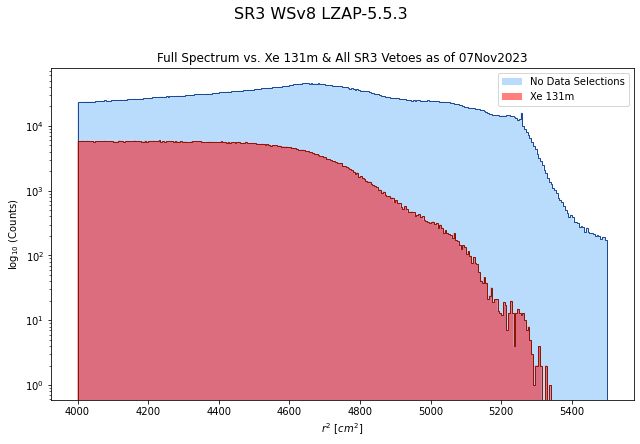

In [7]:
# counts vs. r2, main signal compared to Kr83m

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

# set the number of bins
num_bins = 300
plot_range = (4000., 5500.)

# plot histogram without cuts
n1, bins1, _ = ax.hist(r2_cm2, bins=num_bins, range=plot_range, histtype='step', color='xkcd:cobalt', linewidth=1)
ax.hist(r2_cm2, bins=num_bins, range=plot_range, histtype='stepfilled', alpha=0.5, color='xkcd:sky blue', label='No Data Selections')

# plot histogram with cuts in red
n2, bins2, _ = ax.hist(r2_cm2_xe131m, bins=num_bins, range=plot_range, histtype='step', color='xkcd:brick red', linewidth=1)
ax.hist(r2_cm2_xe131m, bins=num_bins, range=plot_range, histtype='stepfilled', alpha=0.5, color='red', label='Xe 131m')

# plot settings
ax.set_xlabel('$r^2$ [${cm}^2$]')
ax.set_ylabel('log$_{10}$ (Counts)')
ax.set_yscale('log')
ax.set_title('Full Spectrum vs. Xe 131m & All SR3 Vetoes as of 07Nov2023')
ax.legend()

# Add main title above the plot
main_title = "SR3 WSv8 LZAP-5.5.3"
plt.suptitle(main_title, y=1.02, fontsize=16)

# Adjust the spacing between subplots
fig.tight_layout()

Slice: 71.0 us - 103.0 us, Cropped
Interpolated Half Height: 98.9
Interpolated r2: 5013.6 cm2
Uncertainty in r2: 0.6 cm2


(0.0, 330.0)

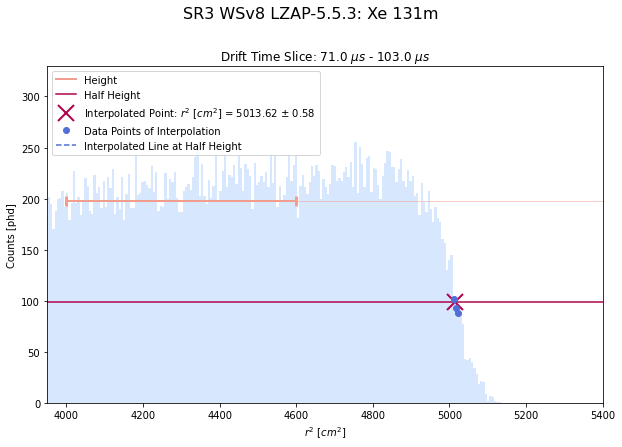

In [14]:
# one slice
# make drift time slice with interpolation
# will do line fitting only from 4000-4600

# Define slice width and starting point (65-1044 us)
one_slice_width = 32.  # us
one_slice_start = 71.  # us
one_slice_end = one_slice_start + one_slice_width
#one_slice_end =  # default 1030 us

# Set up the figure and subplot
fig, ax = plt.subplots(1, figsize=(9, 6))

# Create a mask to select data within the current slice
one_slice_mask = (dT_us_xe131m > one_slice_start) & (dT_us_xe131m <= one_slice_end)
# Filter data with the mask
r2_cm2_xe131m_one_slice = r2_cm2_xe131m[one_slice_mask]
    
    

# Declare the number of bins and range of histo
range_start = 3300
range_stop = 5600
plot_range = (range_start,range_stop)
r2_drop_off = 4100 

# get counts in each slice 
# determine the number of bins 
counts_per_slice = len(r2_cm2_xe131m_one_slice)
num_bins = int(np.sqrt(counts_per_slice))

# Set up histogram
hist_one, bins, _ = ax.hist(r2_cm2_xe131m_one_slice, bins=num_bins, range=plot_range, color='xkcd:powder blue', alpha=0.5)
bin_centers_one = (bins[:-1] + bins[1:]) / 2.
    
# Constant line function for fitting the histogram
def f_const(x, c):
    return np.ones_like(x) * c
    
# only use bins from constant area before the line drops off on the right (bin_centers < 4600)
range_mask_one = (hist_one > 0) & (bin_centers_one < r2_drop_off)
counts_one = hist_one[range_mask_one]
xdata_one = bin_centers_one[range_mask_one]
ydata_one = f_const(xdata_one, counts_one)
    
# find height of counts
# height is popt, variance in height is pcov
popt, pcov = scipy.curve_fit(f_const, xdata_one, ydata_one, p0=[np.max(hist_one[0])])
# get uncertainty in height (uncertainty = standard dev = sqrt(pcov))
perr_one = np.sqrt(np.diag(pcov))
    
# define drift time (us) for each slice
dT_slice_one = (one_slice_start - one_slice_end) / 2.
# define half height and its uncertainty for each slice
hh_one = popt[0] / 2.
d_hh_one = (1/2.) * perr_one
# create array with the same length as bin_centers, fill with hh (for plotting)
hh_array_one = np.full_like(bin_centers_one, hh_one)
    
# interpolation 
# set up 3 adjacent bins, whose average is the closest value to hh
    
# Calculate the sums of the y-values for possible 5 adjacent bins
# adds 3 adjacent bin values
sums_one = np.convolve(hist_one, np.ones(3), mode='valid')
# Find the index of the sum closest to the desired value of (hist - hh)
# this works by finding which set of 3 bins has (sums - 3*hh) closest to 0
# it grabs the index of the first bin
sum_index_one = np.argmin(np.abs(sums_one - 3 * hh_one))
# Get the indices of the 3 adjacent bins corresponding to the selected sum
indices_one = np.arange(sum_index_one, sum_index_one + 3)
# Retrieve the bin center values for those indices
bin_centers_selected_one = bin_centers_one[indices_one]
    
# Create an array of the corresponding (hist - hh) values
h_diff_selected_one = hist_one[indices_one] - hh_one #gives height difference
hh_selected_one = h_diff_selected_one + hh_one #gives half height of selected points
# create array of finer points of h_selected for later computing residuals
hh_selected_fine_one = np.linspace(hh_selected_one[0], hh_selected_one[-1], num = 1000)
    
# Fit a linear interpolation to the selected bin centers and (hist - hh) values
interp_func_one = interp1d(bin_centers_selected_one, h_diff_selected_one, kind='linear')
    
# Generate a finer grid of points for interpolation
interp_x_one = np.linspace(bin_centers_selected_one[0], bin_centers_selected_one[-1], num=1000)
# generate corresponding y values for plotting 
interp_y_one = interp_func_one(interp_x_one)
    
# Interpolate to find the x-value corresponding to (hist - hh)
r2_cm2_hh_one = interp_x_one[np.argmin(np.abs(interp_func_one(interp_x_one)))]
# estimate its uncertainty with residuals
# Compute residuals 
# (y-value) - interp_func(x)
residuals_one = hh_selected_fine_one - interp_y_one
# Estimate uncertainty of r2_cm2_hh
d_r2_cm2_hh_one = np.std(residuals_one)
# Retrieve the corresponding interpolated (hist - hh) value
hh_interp_one = hh_one + interp_func_one(r2_cm2_hh_one)
# for plotting, shift hh_interp values up to their proper location on the plot, coming from the hh point
# this gives the counts that correseponds to r2 at the half height
interp_y_shifted_one = interp_y_one + hh_interp_one
    
# add labels, set axes of plots
ax.set_xlabel('$r^2$ [${cm}^2$]')
ax.set_ylabel('Counts [phd]')
title = f"Drift Time Slice: {one_slice_start} $\mu s$ - {one_slice_end} $\mu s$"
ax.set_title(title)
ax.set_xlim([3950., 5400.])
#ax.set_ylim([0,250])
    
# Plot the points at full height from fitting, x positions of the start and end, height as y position
x_start_one, y_start_one = 4000, popt
x_end_one, y_end_one = 4600, popt
ax.plot(x_start_one, y_start_one, "|", markersize=10, mew=3, color='xkcd:blush')
ax.plot(x_end_one, y_end_one, "|", markersize=10, mew=3, color='xkcd:blush')

# Plot bold line at the full height in the actual range of the fitting 
ax.plot([x_start_one, x_end_one], [y_start_one, y_end_one], '-', linewidth=2, label='Height', color='xkcd:blush')

# Plot constant line at full height, through the whole x-range
# declare final x location at 5400
x_final_one, y_final_one = 5400, popt
ax.plot([x_start_one, x_final_one], [y_start_one, y_final_one], '-', linewidth=0.5, color='xkcd:blush')
    
# Plot half height constant line
ax.plot(bin_centers_one, hh_array_one, '-', label='Half Height', color='xkcd:raspberry')

# # Plot the point (r2_cm2_hh, hh_interp)
# ax.plot(r2_cm2_hh_one, hh_interp_one, 'x', markersize=16, mew=2, label=f'Interpolated Point: {r2_cm2_hh_one:.2f}', color='xkcd:raspberry')
# Plot the point (r2_cm2_hh, hh_interp)
r2_cm2_label = f'Interpolated Point: $r^2$ [$cm^2$] = {r2_cm2_hh_one:.2f} ± {d_r2_cm2_hh_one:.2f}'
ax.plot(r2_cm2_hh_one, hh_interp_one, 'x', markersize=16, mew=2, label=r2_cm2_label, color='xkcd:raspberry')

# plot data points used to interpolate
ax.plot(bin_centers_selected_one, hh_selected_one, 'o', label='Data Points of Interpolation', color='xkcd:cornflower blue')

# Plot the interpolated line
ax.plot(interp_x_one, interp_y_shifted_one, '--', label='Interpolated Line at Half Height', color='xkcd:cornflower blue')
 
# add legend
ax.legend(loc='upper left')

# print r2_cm2_hh, hh, and popt
print(f"Slice: {one_slice_start} us - {one_slice_end} us, Cropped")
print(f"Interpolated Half Height: {round(hh_interp_one, 1)}")
print(f"Interpolated r2: {round(r2_cm2_hh_one,1)} cm2")
print(f"Uncertainty in r2: {round(d_r2_cm2_hh_one,1)} cm2")

# Adjust spacing between subplots
fig.tight_layout(pad=2.0)

# Add main title above the subplots
main_title = "SR3 WSv8 LZAP-5.5.3: Xe 131m"
fig.suptitle(main_title, y=1.05, fontsize=16)
y_max = 75 + np.max(hist_one)
plt.ylim(0,y_max)


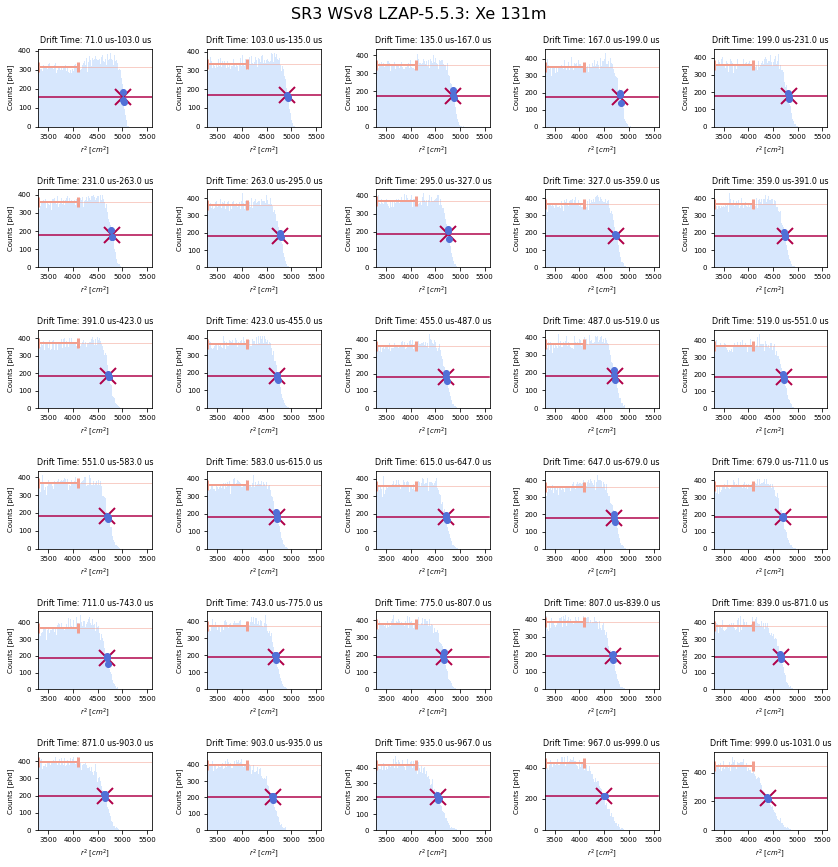

In [15]:
# make drift time slices with interpolation

# Define slice width and starting point
slice_width = 32.  # us
start_time = 71.  # us
end_time = 1030. # default 950 us

# Define the number of slices and plots per row
num_slices = math.ceil((end_time - start_time) / slice_width)
plots_per_row = [5] * math.ceil(num_slices / 5)
plots_per_row[-1] = num_slices - sum(plots_per_row[:-1])
num_rows = len(plots_per_row) 

# Initialize arrays to store values for each slice
h_all_loop = np.zeros(num_slices)
d_h_all_loop = np.zeros(num_slices)
hh_all_loop = np.zeros(num_slices)
d_hh_all_loop = np.zeros(num_slices)
r2_cm2_hh_all_loop = np.zeros(num_slices)
d_r2_cm2_hh_all_loop = np.zeros(num_slices)
drift_time_start_loop = np.zeros(num_slices)
drift_time_end_loop = np.zeros(num_slices)
drift_time_middle_loop = np.zeros(num_slices)
slice_counts = np.zeros(num_slices)

# Set up the figure and subplots
fig, axs = plt.subplots(num_rows, max(plots_per_row), figsize=(12, num_rows * 2))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Constant line function for fitting the histogram
def f_const(x, c):
    return np.ones_like(x) * c
    

# Iterate over the slices
for i in range(num_slices):
    
    # Declare variables
    
    # dT (us) and r2 (cm2)
    dT = dT_us_xe131m
    r2 = r2_cm2_xe131m
    # constant drop off (cm2)
    r2_drop_off = 4100 
    
    # Define the slice boundaries
    slice_start = start_time + i * slice_width
    slice_end = slice_start + slice_width
    
    # get drift time start, stop, and middle point
    drift_time_start = slice_start
    drift_time_end = slice_end
    drift_time_middle = (slice_start + slice_end) / 2.

    # Create a mask to select data within the current slice
    # this mask will include how the histogram is being fitted as well
    
    # Declare the number of bins and range of histo
    range_start = 3300
    range_stop = 5600
    plot_range = (range_start,range_stop)
    
    # define the mask of each slice in terms of dT and r2 histo range
    slice_mask = (dT > slice_start) & (dT <= slice_end) & (r2 > range_start) & (r2 <= 5600)
    # Filter data with the mask
    r2_slice = r2[slice_mask]
    
    # get counts in each slice 
    # determine the number of bins 
    counts_per_slice = len(r2_slice)
    num_bins = int(np.sqrt(counts_per_slice))

    # Set the current subplot
    ax = axs[i]

    # Set up histogram
    hist, bins, _ = ax.hist(r2_slice, bins=num_bins, range=plot_range, color='xkcd:powder blue', alpha=0.5)
    bin_centers = (bins[:-1] + bins[1:]) / 2.
    
    # only use bins from constant area before the line drops off on the right 
    range_mask = (hist > 0) & (bin_centers < r2_drop_off)
    counts = hist[range_mask]
    xdata = bin_centers[range_mask]
    ydata = f_const(xdata, counts)
    
    # find height of counts
    # height is popt, variance in height is pcov
    popt, pcov = scipy.curve_fit(f_const, xdata, ydata, p0=[np.max(hist[0])])
    # get uncertainty in height (uncertainty = standard dev = sqrt(pcov))
    perr = np.sqrt(np.diag(pcov))
    
    # define drift time (us) for each slice
    dT_slice = (slice_start - slice_end) / 2.
    # define half height and its uncertainty for each slice
    hh = popt[0] / 2.
    d_hh = (1/2.) * perr
    # create array with the same length as bin_centers, fill with hh (for plotting)
    hh_array = np.full_like(bin_centers, hh)
    
    # interpolation 
    # set up 3 adjacent bins, whose average is the closest value to hh
    
    # Calculate the sums of the y-values for possible 5 adjacent bins
    # adds 3 adjacent bin values
    sums = np.convolve(hist, np.ones(3), mode='valid')
    # Find the index of the sum closest to the desired value of (hist - hh)
    # this works by finding which set of 3 bins has (sums - 3*hh) closest to 0
    # it grabs the index of the first bin
    sum_index = np.argmin(np.abs(sums - 3 * hh))
    # Get the indices of the 3 adjacent bins corresponding to the selected sum
    indices = np.arange(sum_index, sum_index + 3)
    # Retrieve the bin center values for those indices
    bin_centers_selected = bin_centers[indices]
    
    # Create an array of the corresponding (hist - hh) values
    h_diff_selected = hist[indices] - hh #gives height difference
    hh_selected = h_diff_selected + hh #gives half height of selected points
    # create array of finer points of h_selected for later computing residuals
    hh_selected_fine = np.linspace(hh_selected[0], hh_selected[-1], num = 1000)
    
    # Fit a linear interpolation to the selected bin centers and (hist - hh) values
    interp_func = interp1d(bin_centers_selected, h_diff_selected, kind='linear')
    
    # Generate a finer grid of points for interpolation
    interp_x = np.linspace(bin_centers_selected[0], bin_centers_selected[-1], num=1000)
    # generate corresponding y values for plotting 
    interp_y = interp_func(interp_x)
    
    # Interpolate to find the x-value corresponding to (hist - hh)
    r2_cm2_hh = interp_x[np.argmin(np.abs(interp_func(interp_x)))]
    # estimate its uncertainty with residuals
    # Compute residuals 
    # (y-value) - interp_func(x)
    residuals = hh_selected_fine - interp_y
    # Estimate uncertainty of r2_cm2_hh
    d_r2_cm2_hh = np.std(residuals)
    # Retrieve the corresponding interpolated (hist - hh) value
    hh_interp = hh + interp_func(r2_cm2_hh)
    # for plotting, shift hh_interp values up to their proper location on the plot, coming from the hh point
    interp_y_shifted = interp_y + hh_interp

    # store all values in corresponding arrays
    h_all_loop[i] = popt[0]
    d_h_all_loop[i] = perr[0]
    hh_all_loop[i] = hh
    d_hh_all_loop[i] = d_hh
    r2_cm2_hh_all_loop[i] = r2_cm2_hh
    d_r2_cm2_hh_all_loop[i] = d_r2_cm2_hh
    drift_time_start_loop[i] = drift_time_start
    drift_time_end_loop[i] = drift_time_end
    drift_time_middle_loop[i] = drift_time_middle
    slice_counts[i] = counts_per_slice
    
    # add labels, set axes of plots
    ax.set_xlabel('$r^2$ [${cm}^2$]', fontsize=7)
    ax.set_ylabel('Counts [phd]', fontsize=7)
    ax.tick_params(axis='both', labelsize=7)
    title = f"Drift Time: {slice_start} us-{slice_end} us"
    ax.set_title(title, fontsize=8)
    ax.set_xlim([range_start, range_stop])
    
    # Plot the points at full height from fitting, x positions of the start and end, height as y position
    x_start, y_start = range_start, popt
    x_end, y_end = r2_drop_off, popt
    ax.plot(x_start, y_start, "|", markersize=10, mew=3, color='xkcd:blush')
    ax.plot(x_end, y_end, "|", markersize=10, mew=3, color='xkcd:blush')

    # Plot bold line at the full height in the actual range of the fitting 
    ax.plot([x_start, x_end], [y_start, y_end], '-', linewidth=2, label='Height', color='xkcd:blush')

    # Plot constant line at full height, through the whole x-range
    # declare final x location range_stop
    x_final, y_final = range_stop, popt
    ax.plot([x_start, x_final], [y_start, y_final], '-', linewidth=0.5, color='xkcd:blush')
    
    # Plot half height constant line
    ax.plot(bin_centers, hh_array, '-', label='Half Height', color='xkcd:raspberry')

    # Plot the point (r2_cm2_hh, hh_interp)
    ax.plot(r2_cm2_hh, hh_interp, 'x', markersize=16, mew=2, label='Interpolated Point', color='xkcd:raspberry')
    
    # plot data points used to interpolate
    ax.plot(bin_centers_selected, hh_selected, 'o', label='Data Points of Interpolation', color='xkcd:cornflower blue')

    # Plot the interpolated line
    ax.plot(interp_x, interp_y_shifted, '--', label='Interpolated Line at Half Height', color='xkcd:cornflower blue')
 
    # # toggle on to view each slice's result individually
    # # print r2_cm2_hh, hh, and popt
    # print(f"Slice: {slice_start} us - {slice_end} us")
    # print(f"Interpolated Half Height: {round(hh_interp, 1)}")
    # print(f"Interpolated r2: {round(r2_cm2_hh,1)} cm2")
    # print(f"Uncertainty in r2: {round(d_r2_cm2_hh,1)} cm2")
    # print()

# Remove empty subplots
for i in range(num_slices, num_rows * max(plots_per_row)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout(pad=2.0)

# Add main title above the subplots
main_title = "SR3 WSv8 LZAP-5.5.3: Xe 131m"
fig.suptitle(main_title, y=1.01, fontsize=16)

# change variable names
h = h_all_loop
d_h = d_h_all_loop
hh = hh_all_loop
d_hh = d_hh_all_loop
r2_cm2_hh = r2_cm2_hh_all_loop
d_r2_cm2_hh = d_r2_cm2_hh_all_loop
dT_start = drift_time_start_loop
dT_end = drift_time_end_loop
dT_middle = drift_time_middle_loop

In [16]:
# pickle amplitude, mean, std dev of the gaussians used to define the wall 

SR3v8_Xe131m_dT_slices = {
    'dT_mid': dT_middle,
    'dT_start': dT_start,
    'dT_end': dT_end,
    'r2_Xe131m_wall': r2_cm2_hh,
    'd_r2_Xe131m_wall': d_r2_cm2_hh,
    'dT_slice_counts': slice_counts,
    'num_dT_slices': num_slices
}

with open('SR3v8_Xe131m_dT_slices.pickle', 'wb') as file:
    pickle.dump(SR3v8_Xe131m_dT_slices, file)


In [20]:
# Create a list or tuple with your data
data = [(dT_start, dT_middle, dT_end, r2_cm2_hh, d_r2_cm2_hh)]

# Specify the file name
csv_file = '/global/homes/k/kwild/SR3RunsAnalysis/analysis/xe131m_wall.csv'

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header if needed
    writer.writerow(['dT_start', 'dT_middle', 'dT_end', 'r2_Xe131m_wall', 'd_r2_Xe131m_wall'])
    
    # Write the data
    writer.writerows(data)

print(f'Data has been saved to {csv_file}.')

Data has been saved to /global/homes/k/kwild/SR3RunsAnalysis/analysis/xe131m_wall.csv.


In [21]:
# drift time limits
min_dT = 65
max_dT = 1044

# drift time mask 
dT_lim_mask = (dT_us_xe131m > min_dT) & (dT_us_xe131m < max_dT)

# limit data with mask 
r2_cm2_xe131m_dTlim = r2_cm2_xe131m[dT_lim_mask]
dT_us_xe131m_dTlim = dT_us_xe131m[dT_lim_mask]

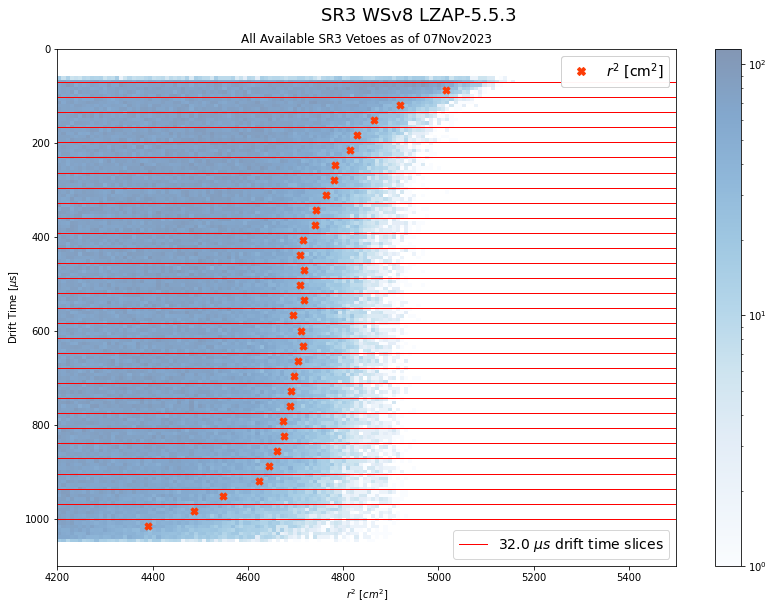

In [25]:
# y_cm vs. x_cm AND drift time vs r2

# Set up the figure and axes for subplots
fig, ax4 = plt.subplots(1, 1, figsize=(12, 9))


# set the number of bins and range for drift time vs r2
# dT >= 65, dT <= 1044
num_bins = 150
plot_range = [[4200.,5500.], [0.,1100.]]

# ALL VETOES AVAILABLE AS OF 07Nov2023

# drift time vs. r^2
h_dT_slices = ax4.hist2d(r2_cm2_xe131m_dTlim, dT_us_xe131m_dTlim, bins = num_bins, range = plot_range, norm = colors.LogNorm(), cmap='Blues', alpha=0.5)
ax4.set_xlabel('$r^2$ [${cm}^2$]')
ax4.set_ylabel('Drift Time [$\mu$s]')
ax4.set_title('All Available SR3 Vetoes as of 07Nov2023')

# Draw horizontal lines at intervals of 30 us from start_time to end_time
current_time = start_time
while current_time <= end_time:
    ax4.hlines(current_time, plot_range[0][0], plot_range[0][1], colors='red', linestyles='solid', linewidth=1)
    current_time += slice_width

# Add colorbars to the plot
cbar = fig.colorbar(h_dT_slices[3], ax=ax4)

scatter = plt.scatter(r2_cm2_hh, dT_middle, marker="X", s=50, color="xkcd:red orange", label='$r^2$ [cm$^2$]')

# Add main title above the plot
main_title = "SR3 WSv8 LZAP-5.5.3"
plt.suptitle(main_title, y=0.95, fontsize=18)

# Create custom legend entries
line_legend = Line2D([0], [0], color='red', linestyle='solid', linewidth=1, label=f"{slice_width} $\mu s$ drift time slices")
scatter_legend = Line2D([0], [0], marker='X', color="xkcd:red orange", markersize=8, linestyle='None', label='$r^2$ [cm$^2$]')

# Add legends with custom entries
legend_line = ax4.legend(handles=[line_legend], loc='lower right', prop={'size': 14})
legend_scatter = ax4.legend(handles=[scatter_legend], loc='upper right', prop={'size': 14})

# Combine legends
ax4.add_artist(legend_line)
ax4.add_artist(legend_scatter)

# # Create custom legend entries
# line_legend = Line2D([0], [0], color='red', linestyle='solid', linewidth=1, label='30 $\mu s$ drift time slices')
# scatter_legend = Line2D([0], [0], marker='X', color="xkcd:red orange", markersize=8, linestyle='None', label='$r^2$ [cm$^2$]')

# # Add legends with custom entries
# legend_line = ax4.legend(handles=[line_legend], loc='lower right', prop={'size': 14})
# legend_scatter = ax4.legend(handles=[scatter_legend], loc='lower right', prop={'size': 14}, bbox_to_anchor=(1.05, 0))

# # Combine legends
# ax4.add_artist(legend_line)
# ax4.add_artist(legend_scatter)

# # Create custom legend entries
# line_legend = Line2D([0], [0], color='red', linestyle='solid', linewidth=1, label='30 $\mu s$ drift time slices')
# scatter_legend = Line2D([0], [0], marker='X', color="xkcd:red orange", markersize=8, label='$r^2$ [cm$^2$]')

# # Add legend with custom entries
# legend = ax4.legend(handles=[line_legend, scatter_legend], loc='lower right', prop={'size': 14})

# # Adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.3, hspace=0.2)
# Adjust spacing between subplots
fig.tight_layout(pad=2.0)

# Flip the y-axis for specific subplots
ax4.invert_yaxis()

Wall Fit Coefficients, popt: [-1.87956813e-09  1.69251113e-06  9.04765063e-04 -1.30809055e+00
  5.04573975e+03]
Wall Fit Covariance Matrix, pcov: [[ 4.09843440e-19 -9.52456677e-16  7.70804970e-13 -2.55219607e-10
   2.86148682e-08]
 [-9.52456677e-16  2.22509971e-12 -1.81236966e-09  6.04954583e-07
  -6.85671802e-05]
 [ 7.70804970e-13 -1.81236966e-09  1.48856113e-06 -5.02328125e-04
   5.78094319e-02]
 [-2.55219607e-10  6.04954583e-07 -5.02328125e-04  1.72073294e-01
  -2.02376794e+01]
 [ 2.86148682e-08 -6.85671802e-05  5.78094319e-02 -2.02376794e+01
   2.45899714e+03]]
a0: -1.8795681260723757e-09
a1: 1.6925111339095621e-06
a2: 0.0009047650627459974
a3: -1.3080905471661834
a4: 5045.73975146906
a0: -1.8795681260723757e-09 ± 6.40190159229021e-10
a1: 1.6925111339095621e-06 ± 1.4916768130862497e-06
a2: 0.0009047650627459974 ± 0.0012200660341561362
a3: -1.3080905471661834 ± 0.4148171810986499
a4: 5045.73975146906 ± 49.58827623649331


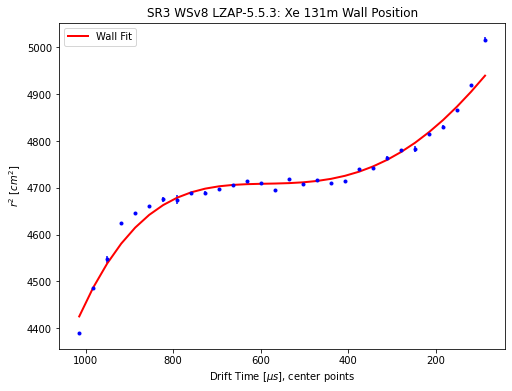

In [23]:
# plot drift time vs. r2

# Set up the figure and subplot
fig, ax = plt.subplots(1, figsize=(8, 6))

# Sample data points with errors in the x-axis
x_pts = dT_middle
y_pts = r2_cm2_hh
y_err = d_r2_cm2_hh

# plot points with error
plt.errorbar(x_pts, y_pts, yerr=y_err, fmt='b.')

def poly_func(x, *coeffs):
    y = np.polyval(coeffs, x)
    return y

# Perform polynomial fitting with curve_fit
deg = 5  
p0 = np.ones(deg)
popt_wall_fit, pcov_wall_fit = curve_fit(poly_func, x_pts, y_pts, p0=p0, sigma=y_err)

# Generate data for the wall polynomial curve
x_fit = np.linspace(min(x_pts), max(x_pts), num_slices)
y_fit = poly_func(x_fit, *popt_wall_fit)

# Define parameter names (e.g., a0, a1, a2, ...)
param_names = [f'a{i}' for i in range(deg)]

# Plot the wall polynomial fit
plt.plot(x_fit, y_fit, label='Wall Fit', lw=2, color='red')

# Setting labels and title
plt.xlabel('Drift Time [$\mu s$], center points')
plt.ylabel('$r^2$ [${cm}^2$]')
plt.title('SR3 WSv8 LZAP-5.5.3: Xe 131m Wall Position')
plt.legend()

# flip drift time axis
plt.gca().invert_xaxis()

# print fitting parameters
print(f"Wall Fit Coefficients, popt: {popt_wall_fit}")
print(f"Wall Fit Covariance Matrix, pcov: {pcov_wall_fit}")

# Print fitting parameters with names
for i, param_name in enumerate(param_names):
    print(f"{param_name}: {popt_wall_fit[i]}")
    
# Estimate the uncertainties of the fit parameters
param_uncertainties = np.sqrt(np.abs(np.diag(pcov_wall_fit)))

# Print the uncertainties of the fit parameters with names
for i, (param_name, uncertainty) in enumerate(zip(param_names, param_uncertainties)):
    print(f"{param_name}: {popt_wall_fit[i]} ± {uncertainty}")


In [24]:
# save curve fit to a pickle file

SR3v8_Xe131m_wall_fit = {
    'wall_fit_coeffs_Xe131m': popt_wall_fit,
    'wall_fit_cov_matrix_Xe131m': pcov_wall_fit,
    'dT_us_fit_Xe131m': x_fit,
    'r2_cm2_fit_Xe131m': y_fit
}

with open('SR3v8_Xe131m_wall_fit.pickle', 'wb') as file:
    pickle.dump(SR3v8_Xe131m_wall_fit, file)